# Aircraft Risk Analysis for Aviation Expansion

## 1.0 Project Overview

The company is exploring a new opportunity in aviation by acquiring aircraft for commercial and private use.

To support this, analysis of aviation accident records from the National Transportation Safety Board (NTSB) is done, covering incidents from 1962 to 2023. The dataset has records of aviation accidents, specifically in the United States (U.S.) and surrounding international waters.


### Project Goal
The project aims to help the company identify the aircraft options that are low risk. This is done by answering three questions: 

• Which aircraft types have the fewest and least severe accidents?  
• What factors are linked to the most serious accidents?  
• How have accident patterns changed over time?

The project goal is to turn the data into actionable recommendations that the Aviation Division can act on.

### Business Stakeholder
The primary stakeholder is the Head of the Aviation Division, who needs insights that are actionable to guide safe investment choices.

### Key Business Questions:

1. Which aircraft types have the lowest accident rates and severities?
2. What conditions are associated with fatal incidents?
3. How have aviation safety trends changed over time?


The notebook will answer these questions through data cleaning, exploration, analysis and visualization to inform data driven and actionable recommendations.

## 2.0 Data Understanding

This section explores the dataset to prepare it for analysis. The dataset was provided by the National Transportation Safety Board (NTSB) and has civil aviation incidents and accidents from 1962 to 2023.

Understanding the data helps to identify the important features of the dataset. In addition, it aids in checking for any issues such as missing values.

### 2.1 Loading and Previewing the Dataset

The necessary Python libraries for data analysis and visualization are imported. The dataset is then loaded into a pandas DataFrame.

#### 2.1.1 Importing Required Libraries

In [172]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

#### 2.1.2 Loading the Dataset

In [173]:
# Extract the zipped file
unzipped = "AviationData.csv.zip"
with zipfile.ZipFile(unzipped, 'r') as zip_ref:
    zip_ref.extractall("unzipped_folder") 

# Load the dataset
df = pd.read_csv("unzipped_folder/AviationData.csv", encoding='ISO-8859-1', low_memory=False)


### 2.1.3 Previewing the Dataset

The first five rows are displayed to get a preview of the structure of the dataset.

In [174]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


The rows represents each civil aviation accident. The columns includes information about the date, location, weather condition and injury outcomes.


### 2.2 Dataset Structure

This section covers the review of the basic details of the dataset.

In [175]:
# Check the shape of the dataset
df.shape

(88889, 31)

In [176]:
# View all column names
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

The dataset contains 88889 rows and 31 columns. This is a large and detailed dataset.

### 2.3 Exploring Data Types and Uniqueness

In [177]:
# Display data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [178]:
# Check the number of unique values in each column
df.nunique().sort_values(ascending=False).head(31)

Accident.Number           88863
Event.Id                  87951
Registration.Number       79104
Location                  27758
Longitude                 27154
Latitude                  25589
Airport.Name              24870
Report.Status             17074
Event.Date                14782
Air.carrier               13590
Model                     12318
Airport.Code              10374
Make                       8237
Publication.Date           2924
Total.Uninjured             379
Country                     219
Total.Fatal.Injuries        125
Injury.Severity             109
Total.Minor.Injuries         57
Total.Serious.Injuries       50
FAR.Description              31
Purpose.of.flight            26
Aircraft.Category            15
Engine.Type                  12
Broad.phase.of.flight        12
Number.of.Engines             7
Weather.Condition             4
Aircraft.damage               4
Schedule                      3
Amateur.Built                 2
Investigation.Type            2
dtype: i

### 2.4 Descriptive Statistics

In [179]:
# Show descriptive statistics for numeric columns
df.describe() 

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


From the above summary, most flights reported zero injuries. However, there are records that show high values suggesting that for these instances, the impact is large.

### 2.5 Missing Values

#### 2.5.1 Checking for Missing Values

In [180]:
# Display the columns with the missing values
df.isnull().sum().sort_values(ascending=False).head(31)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Investigation.Type            0
Event.Date                    0
Accident.Number               0
Event.Id                      0
dtype: i

There are columns such as 'Schedule', 'Air.carrier' and 'FAR.Description' that have a large number of missing values. During data cleaning, the missing values will be dealt with.

#### 2.5.2 Visualizing Missing Data

The heatmap below shows where data is missing in the dataset. The yellow line represents a missing value in the particular row and column. This makes it possible to see which columns have many missing values that may need to be cleaned.

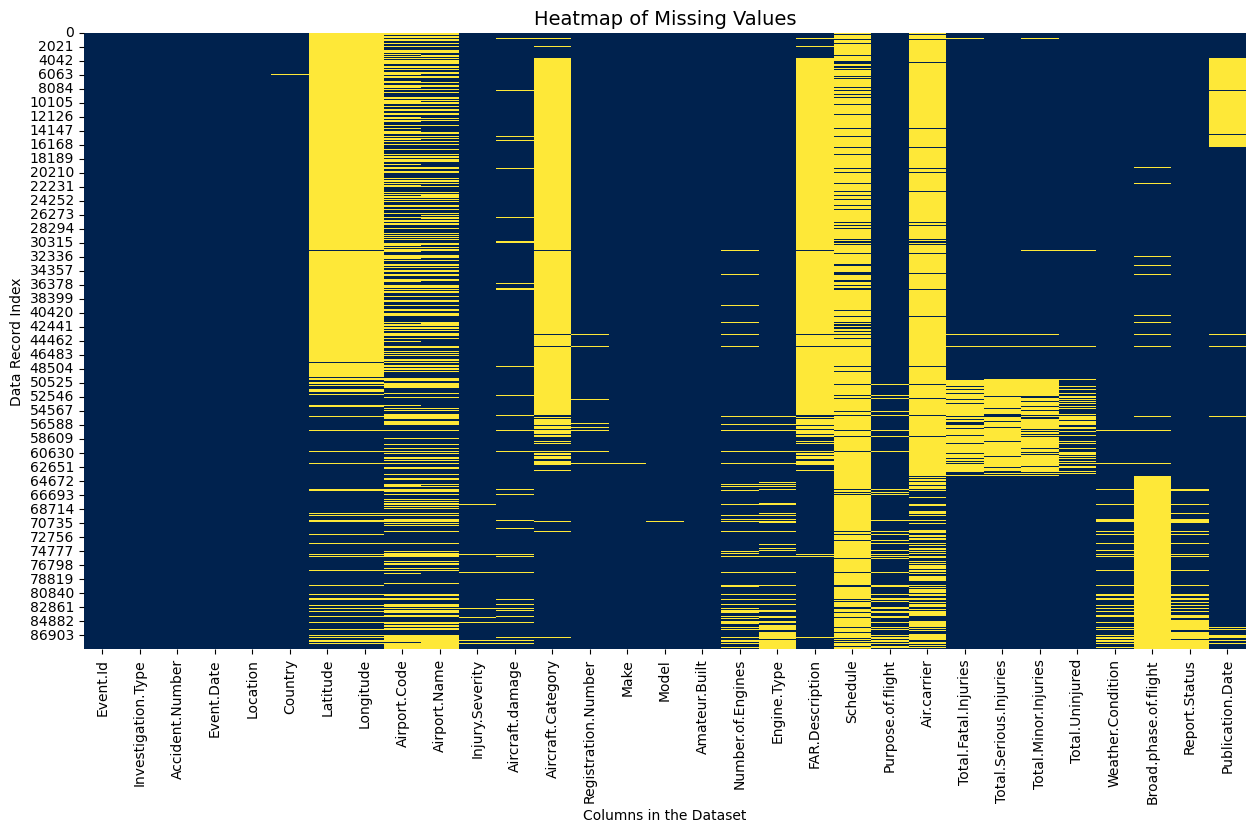

In [181]:
# Heatmap illustrating the missing values
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cmap='cividis', cbar=False)
plt.title('Heatmap of Missing Values', fontsize=14)
plt.xlabel('Columns in the Dataset')
plt.ylabel('Data Record Index')
plt.show()

### 2.6 Key Observations

From the above data exploration, the following key observations were made:

• The dataset has 88,889 rows and 31 columns. 

• There are columns with a large number of missing values. 

• Columns such as 'Aircraft.damage' and 'Weather.Condition' require data cleaning as they may contain valuable insights.

These observations show the importance of data cleaning before drawing conclusions.

### 2.7 Next Steps

This section has provided insights that can guide the following next steps:

• Handling missing values. This can be done by dropping them.

• Standardizing column values such as country names.

• Removing duplicates and checking for outliers.

• Preparing the dataset for visualization by ensuring that the relevant columns are in the correct format.

These steps will be addressed in the Section 3 below.

## 3.0 Data Preparation

### 3.1 Overview of Data Cleaning
The data exploration in Section 2.0 Data Understanding has shown that the dataset contains issues. These issues should be dealt with before data analysis. These include the following:

- Missing values in columns
- Inconsistent naming in rows such as 'Country' and 'Amateur.Built'
- Duplicated rows
- Outliers in some columns

This section outlines the data cleaning steps taken in order to prepare the dataset for data analysis and data 
visualization.


### 3.2 Handling Missing Values
To begin with, it is important to check which columns have missing values and how many.

In [182]:
# Check missing values
df.isnull().sum().sort_values(ascending=False).head(31)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Investigation.Type            0
Event.Date                    0
Accident.Number               0
Event.Id                      0
dtype: i

In [183]:
# Drop columns with more than 50% missing values
df = df.dropna(axis=1, thresh=len(df) * 0.5)

# Fill missing values for numeric columns with the median
df.fillna(df.median(numeric_only=True), inplace=True)

### 3.3 Dropping Redundant Columns

In order to simplify the dataset, repetitive columns are dropped.

In [184]:
# Drop known redundant columns
columns_to_drop = ['Registration.Number', 'Report.Status', 'Event.Id']
df = df.drop(columns=columns_to_drop, errors='ignore')

### 3.4 Standardizing Categorical Variables
There are certain columns that have inconsistent values. It is important to standardize them.

In [185]:
# Standardize the Amateur.Built column
df['Amateur.Built'] = df['Amateur.Built'].replace({'Y': 'Yes','N': 'No','UNK': 'Unknown'})

# Standardize the Country column
df['Country'] = df['Country'].replace({'USA': 'U.S.','United States': 'U.S.'})

# Standardize the Weather.Conditions column
df['Weather.Condition'] = df['Weather.Condition'].replace({
    'UNK': 'UNKNOWN',
    '': 'UNKNOWN'
})


### 3.5 Handling Duplicates
Duplicates can lead to distorted results. This step checks and removes any identical rows.

In [186]:
# Count duplicates
df.duplicated().sum()

# Drop duplicates
df = df.drop_duplicates()

### 3.6 Handling Outliers
It is possible to check numerical columns for outliers. This is by using statistics and by visual representation using a boxplot.

In [187]:
# Describe the key columns
df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
count,88887.000000,88887.000000,88887.000000
mean,0.564773,0.240474,0.309134
std,5.126706,1.434618,2.083737
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,349.000000,161.000000,380.000000


#### *3.1 Visualizing Outliers with a Boxplot*
The boxplot below shows how injury numbers are different across fatal, serious and minor instances.

Each dot represents an outlier. These outliers show rare incidents.

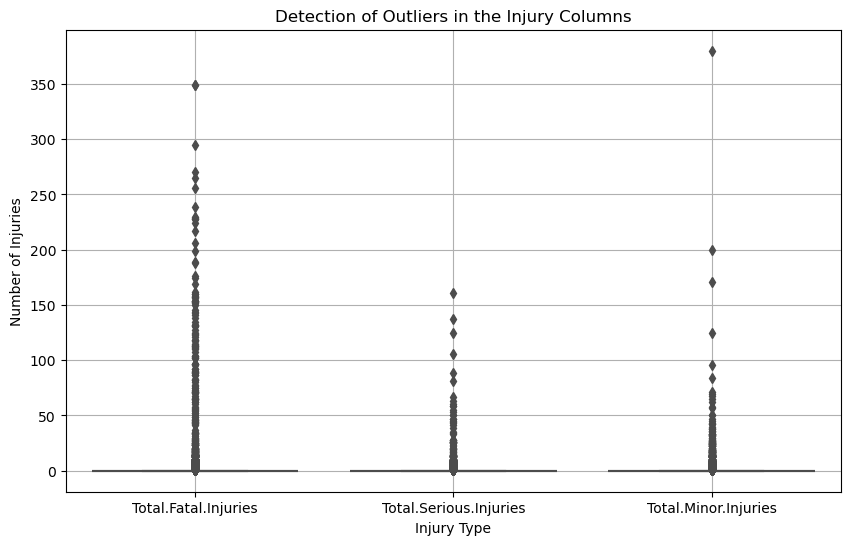

In [188]:
# Visual representation of outliers using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']],
    color='Blue'
)
plt.title('Detection of Outliers in the Injury Columns', fontsize=12)
plt.xlabel('Injury Type')
plt.ylabel('Number of Injuries')
plt.grid(True)
plt.show()

In [189]:
# Drop columns with more than 50% missing values
#df = df.dropna(axis=1, thresh=len(df) * 0.5)

# Fill missing values for numeric columns with the median
#df.fillna(df.median(numeric_only=True), inplace=True)

 # Drop columns with >50% missing
df = df.dropna(axis=1, thresh=len(df) * 0.5) 
# Fill numbers with median
df.fillna(df.median(numeric_only=True), inplace=True) 
# Fill text with 'Unknown' 
df.fillna('Unknown', inplace=True) 
# Drop rows missing Event.Date 
df.dropna(subset=['Event.Date'], inplace=True)  
print("Cleaned up missing data!")

Cleaned up missing data!


### 3.7 Final Dataset Overview

This step checks the shape and data types of the dataset to ascertain that it is ready for data analysis.

In [190]:
# Check the final shape
df.shape

(88887, 22)

In [191]:
# View data types
df.dtypes

Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Publication.Date           object
dtype: object

In [193]:
# Preview cleaned dataset
df.head()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Make,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Publication.Date
0,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",U.S.,Unknown,Unknown,Fatal(2),Destroyed,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNKNOWN,Cruise,Unknown
1,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",U.S.,Unknown,Unknown,Fatal(4),Destroyed,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNKNOWN,Unknown,19-09-1996
2,Accident,NYC07LA005,1974-08-30,"Saltville, VA",U.S.,Unknown,Unknown,Fatal(3),Destroyed,Cessna,...,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,26-02-2007
3,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",U.S.,Unknown,Unknown,Fatal(2),Destroyed,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,12-09-2000
4,Accident,CHI79FA064,1979-08-02,"Canton, OH",U.S.,Unknown,Unknown,Fatal(1),Destroyed,Cessna,...,1.0,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,16-04-1980


In [194]:
# Confirm all missing values are handled
df.isnull().sum().sum()

0

This section has covered all the data cleaning steps:

• The dataset has zero missing values.

• This confirms that all null entries have been removed or filled. 

The data is complete and ready for data analysis in the Section 4.0.


## 4.0 Data Analysis and Data Visualization

To answer the key business questions, this section uses data analysis as well as visualization. The main aim is to guide safe aircraft investment based on several factors. These include accident patterns, the severity and trends over time.

### 4.1 Which aircraft types have the fewest and least severe accidents?

To understand the manufacturers that have the smallest total impact, the data is grouped by the make of the aircraft and sum the number of fatal, serious and minor injuries.

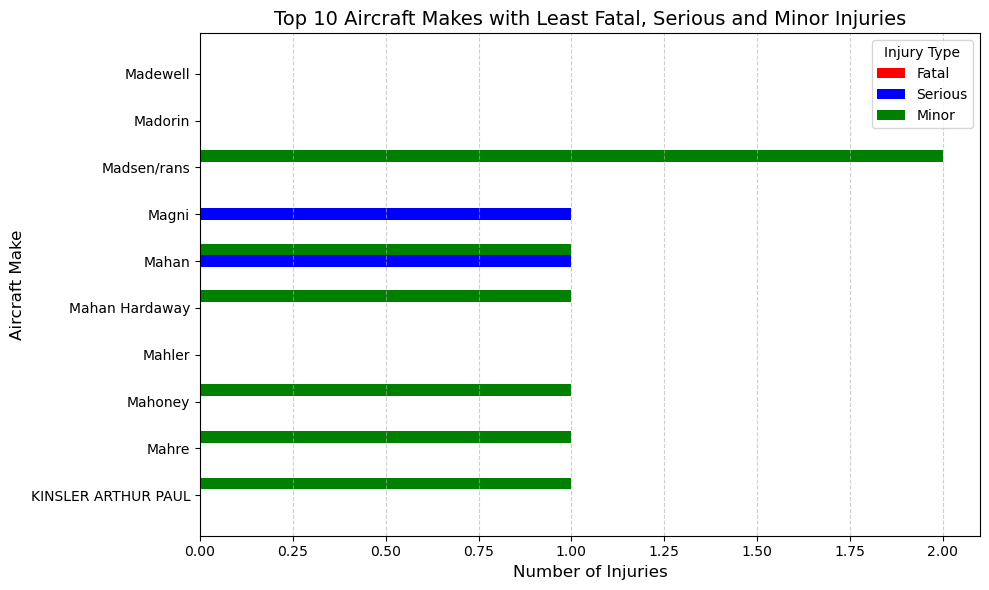

In [195]:
import matplotlib.pyplot as plt
import numpy as np

# Group and sort injury data
injury_make = df.groupby('Make')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()
injury_make = injury_make.sort_values(by='Total.Fatal.Injuries', ascending=True).head(10)

# Reorder columns
injury_make = injury_make[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']]

# Plot bars
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = np.arange(len(injury_make))

# Plot each bar 
ax.barh(index, injury_make['Total.Fatal.Injuries'], bar_width, color='red', label='Fatal')
ax.barh(index + bar_width, injury_make['Total.Serious.Injuries'], bar_width, color='blue', label='Serious')
ax.barh(index + 2 * bar_width, injury_make['Total.Minor.Injuries'], bar_width, color='green', label='Minor')

# Plot
ax.set(yticks=index + bar_width, yticklabels=injury_make.index)
plt.xlabel('Number of Injuries', fontsize=12)
plt.ylabel('Aircraft Make', fontsize=12)
plt.title('Top 10 Aircraft Makes with Least Fatal, Serious and Minor Injuries', fontsize=14)
plt.legend(title='Injury Type')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



- Aircraft makes were grouped, and total fatal, serious and minor injuries were calculated. The 10 with the fewest fatal injuries were selected.

- A horizontal bar chart shows injury types side by side, using color to differentiate by severity. This highlights aircraft makes with consistently low injury counts.

- Most of the selected aircraft makes had very low or no serious and minor injuries, indicating strong safety records.

### 4.2 What conditions are associated with fatal accidents?

The relationship between fatal accidents and factors such as weather conditions, aircraft damage, phase of flight and amateur-built status is explored.

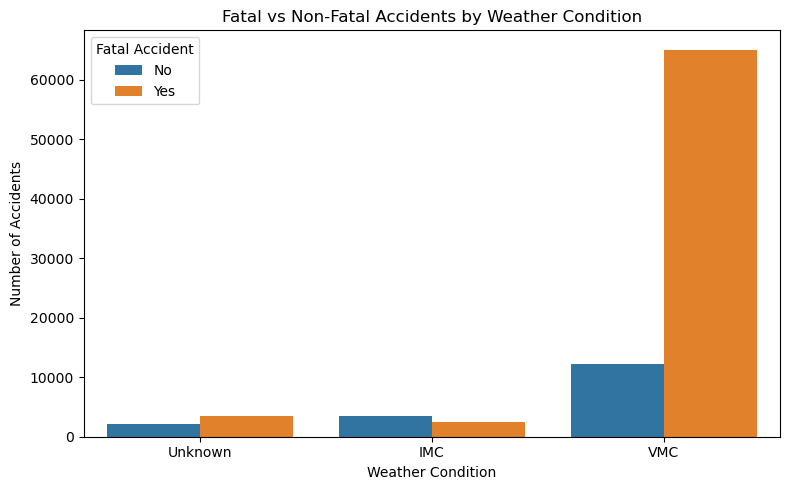

In [196]:
# Create the Fatal_Accident column
df['Fatal_Accident'] = df['Total.Fatal.Injuries'].apply(lambda x: 1 if x > 0 else 0)

# Standardize Weather.Condition
df['Weather.Condition'] = df['Weather.Condition'].replace(
    {'UNKNOWN': 'Unknown', 'Unk': 'Unknown'}
).astype(str)

# Convert the hue column to string
df['Fatal_Accident'] = df['Fatal_Accident'].astype(str)

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Weather.Condition', hue='Fatal_Accident')
plt.title('Fatal vs Non-Fatal Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.legend(title='Fatal Accident', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


- Accidents were categorized as fatal or non-fatal and compared across weather conditions. The goal is to see if weather impacts accident severity.

- Most accidents happened in visual weather, but both IMC and VMC had fatal cases. Good weather alone does not remove risk.

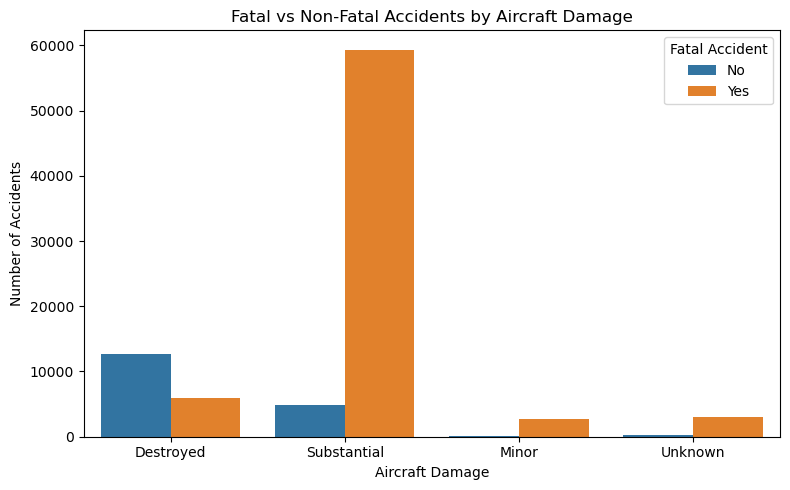

In [197]:
# Plot by Aircraft Damage
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Aircraft.damage', hue='Fatal_Accident')
plt.title('Fatal vs Non-Fatal Accidents by Aircraft Damage')
plt.xlabel('Aircraft Damage')
plt.ylabel('Number of Accidents')
plt.legend(title='Fatal Accident', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

- The above chart compares fatal and non-fatal outcomes across different levels of aircraft damage.

- Fatal outcomes were mostly linked to aircraft destruction while non-fatal cases occurred across all damage types.

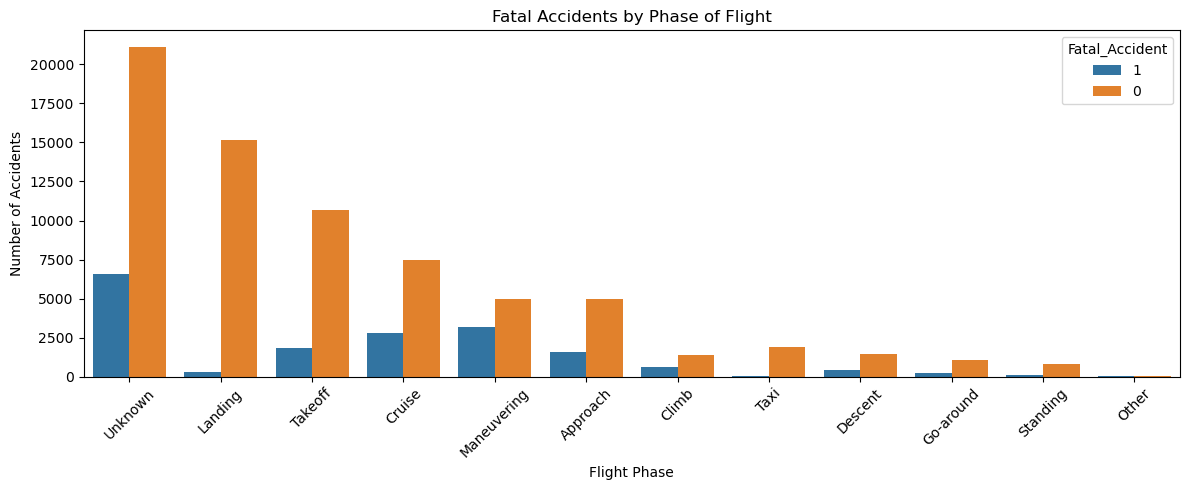

In [198]:
# Plot by Broad Phase of Flight
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Broad.phase.of.flight', hue='Fatal_Accident', order=df['Broad.phase.of.flight'].value_counts().index)
plt.title('Fatal Accidents by Phase of Flight')
plt.xlabel('Flight Phase')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Accidents were analyzed based on the phase of flight like takeoff or landing to see risk-prone stages.

- Most fatal accidents happened during critical phases like approach and landing showing when flights are most vulnerable.

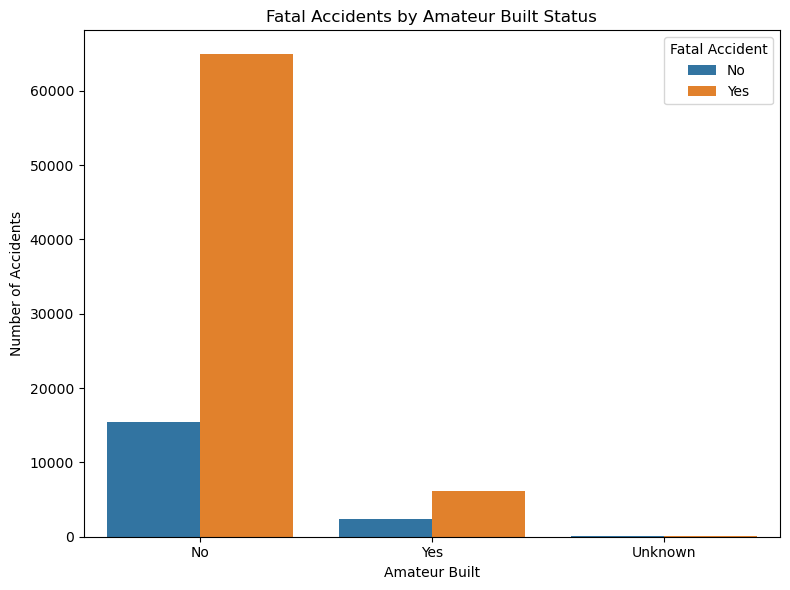

In [199]:
# Plot by Amateur Built
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Amateur.Built', hue='Fatal_Accident')
plt.title('Fatal Accidents by Amateur Built Status')
plt.xlabel('Amateur Built')
plt.ylabel('Number of Accidents')
plt.legend(title='Fatal Accident', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

- The aim is to compare the severity of accidents based on whether the aircraft was amateur built or not.

- Most accidents involved standard aircraft but amateur built ones showed a higher number of fatal cases.

### 4.3 How have accident patterns changed over time?
Accident frequency and fatal injury trends over the years are explored using the Event.Date column.

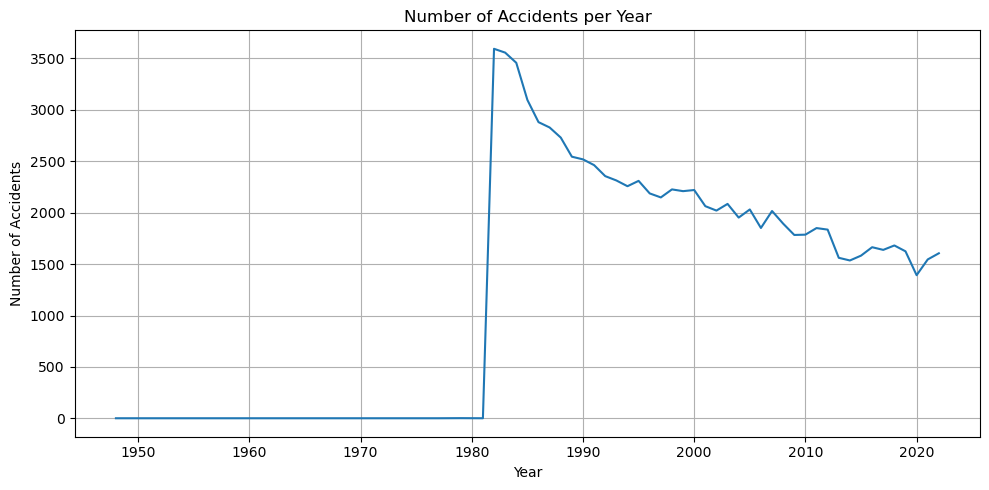

In [200]:
# Event.Date to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Year column
df['Year'] = df['Event.Date'].dt.year

# Group by Year
accidents_by_year = df.groupby('Year').size()
fatalities_by_year = df.groupby('Year')['Total.Fatal.Injuries'].sum()

# Total accidents per year
plt.figure(figsize=(10, 5))
accidents_by_year.plot()
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()


- The number of accidents changed over the years, with some years showing clear increases or drops.



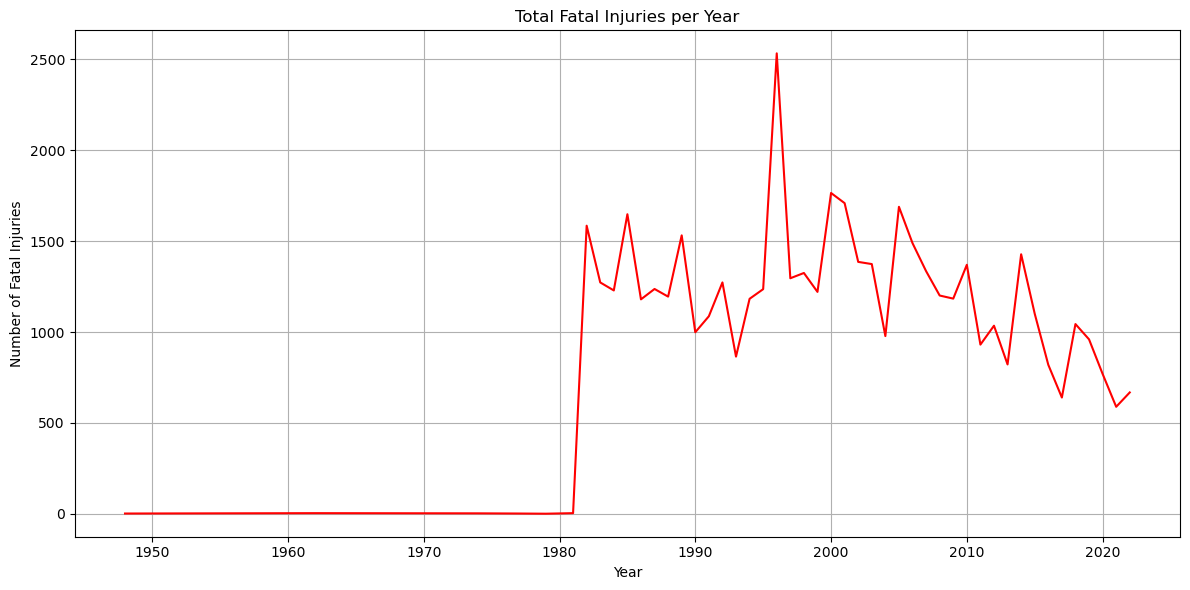

In [201]:
# Total fatal injuries per year
plt.figure(figsize=(12, 6))
fatalities_by_year.plot(color='red')
plt.title('Total Fatal Injuries per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fatal Injuries')
plt.grid(True)
plt.tight_layout()
plt.show()

- Fatal injuries increased in some years and remained low in others.


### 4.4 Summary of Key Findings

- Some aircraft makes consistently show low fatal and serious injury counts, indicating stronger safety records.  
- Fatal accidents are more likely under Visual Meteorological Conditions (VMC) and when the aircraft is destroyed.  
- The approach and initial climb phases are linked to a higher number of fatal outcomes.  
- Accident frequency has declined over time, however, certain years saw an increase in fatalities.  

These insights support the company in selecting safer aircraft and shows conditions that may need targeted safety measures.


## 5.0 Conclusion and Recommendations

### 5.1 Conclusion

This project combines data analysis and visualization to support better decisions in aviation safety. By identifying risky conditions and safer aircraft makes, stakeholders can reduce future accidents and focus resources where they matter most.

### 5.2 Recommendations

1. Select aircraft makes that have consistently low records of fatal and serious injuries.
2. Strengthen safety protocols during approach, climb, and landing phases, which are linked to higher fatality rates.
3. Improve readiness for IMC conditions by ensuring aircraft are well equipped and pilots are adequately trained.
4. Regularly analyze accident trends to inform policy updates and strengthen long term aviation safety.

These actionable recommendations will help rsupport informed evidence-based decision-making as the Aviation Division expands.

In [202]:
# Export cleaned data for Tableau dashboarding
df_export = df[['Make', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries',
                'Event.Date', 'Fatal_Accident', 'Weather.Condition',
                'Broad.phase.of.flight', 'Aircraft.damage']].copy()

# Convert Event.Date to datetime
df_export['Event.Date'] = pd.to_datetime(df_export['Event.Date'], errors='coerce')

# Extract Year for time-based analysis
df_export['Year'] = df_export['Event.Date'].dt.year

# Export to CSV
df_export.to_csv('aviation_dashboard_data.csv', index=False)

print("Complete. File saved as 'aviation_dashboard_data.csv'")


Complete. File saved as 'aviation_dashboard_data.csv'
